In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [8]:
df = pd.read_csv(r"C:\Users\PC\Desktop\TelecomProject\CustomerChurnRawData.csv")

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


DATA CLEANING

In [10]:
### detecting duplicates

duplicates = df.duplicated()

duplicates.sum()

0

In [11]:
### dropping duplicates

df = df.drop_duplicates()

In [12]:
### detecting Null and Missing Values

missing_values = ["NA", "", None, np.NaN]
missing = df.isin(missing_values)
missing.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
### checking the total number of Null values. This should be used in a large dataset to confirm if there are Nulls. And then deleting the null values

missing.sum().sum()
df = df.dropna()

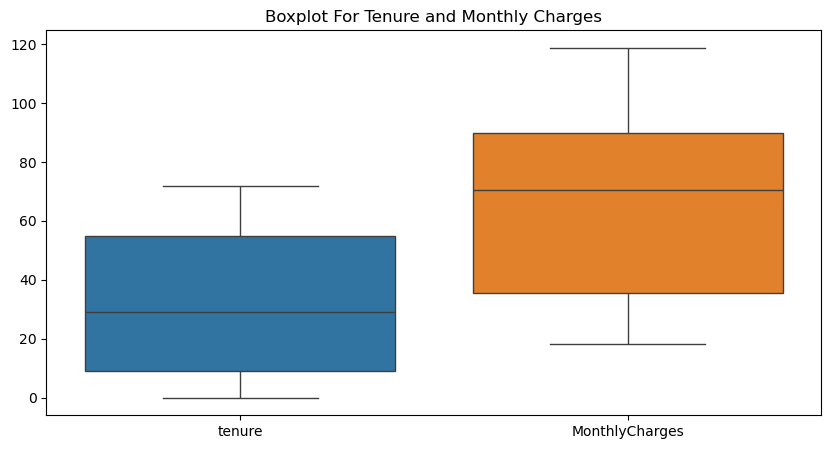

In [14]:
### Boxplot for checking outliers
plot = ["tenure", "MonthlyCharges"]

plt.figure(figsize=(10, 5))
sns.boxplot(df[plot])
plt.title("Boxplot For Tenure and Monthly Charges")
plt.show()

In [15]:
### Confirming that there are no outliers using Z_Score

df['Z_Score'] = stats.zscore(df['MonthlyCharges'])

outliers =  df[df['Z_Score'].abs() > 3]

outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Z_Score


In [16]:
### checking for data types which need to be converted

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
Z_Score             1585
dtype: int64

In [18]:
## changing the data type of SeniorCitizen to a string

df["SeniorCitizen"] = df["SeniorCitizen"].astype('str')

In [19]:
## changing the binary 0 and 1 to Yes and No

df["SeniorCitizen"] = df["SeniorCitizen"].astype('str').str.replace("0", "No")
df["SeniorCitizen"] = df["SeniorCitizen"].astype('str').str.replace("1", "Yes")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Z_Score
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,-1.160323
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,-0.259629
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-0.362660
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,-0.746535
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0.665992
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1.277533
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,-1.168632
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0.320338


EXPLORATORY DATA ANALYSIS

In [20]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Z_Score
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,-1.160323
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,-0.259629
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-0.362660
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,-0.746535
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0.665992
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1.277533
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,-1.168632
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0.320338


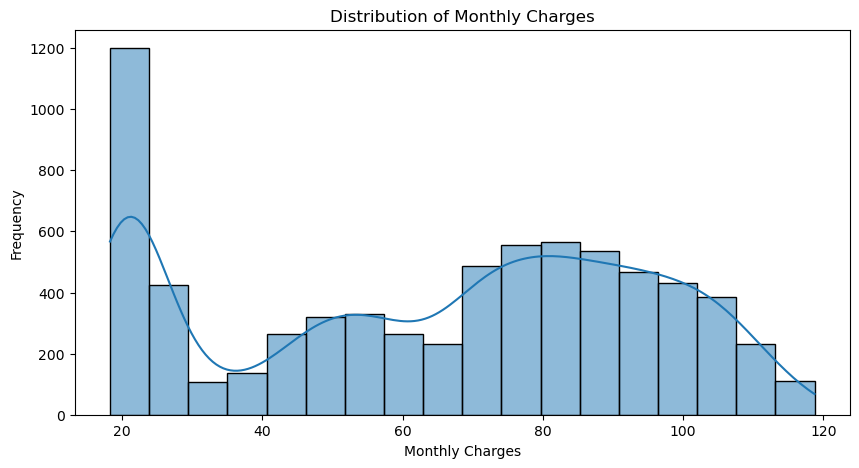

In [21]:
### Checking the distribution of Monthly Charges on the customers using a Histogram

plt.figure(figsize=(10, 5))
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

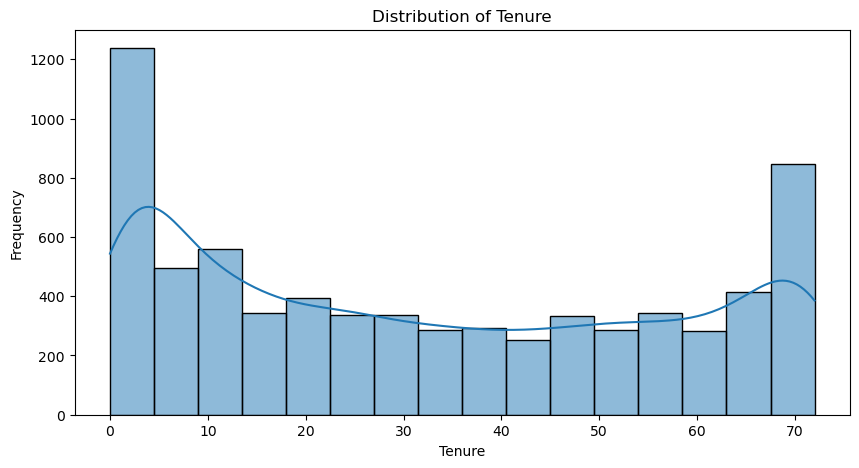

In [22]:
### Checking the distribution of Customer Tenure with the Telco Company using a histogram

plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], kde=True)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

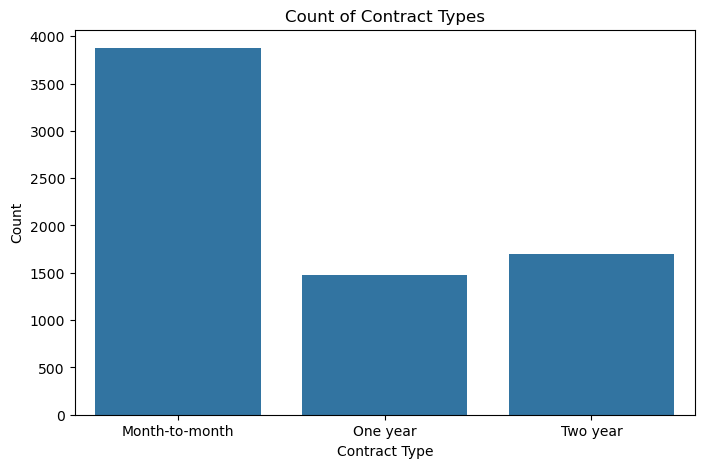

In [23]:
## Checking for the contract type that most customers prefer using a count plot

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Contract'])
plt.title('Count of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

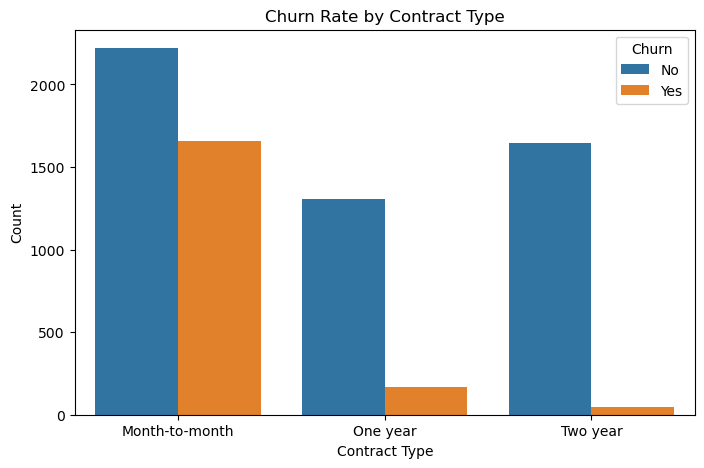

In [24]:
### Churn Rate per Contract Type


plt.figure(figsize=(8, 5))
sns.countplot(x=df['Contract'], hue=df['Churn'])
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

In [25]:
### Converting the total charges to numeric because it was being read as a float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

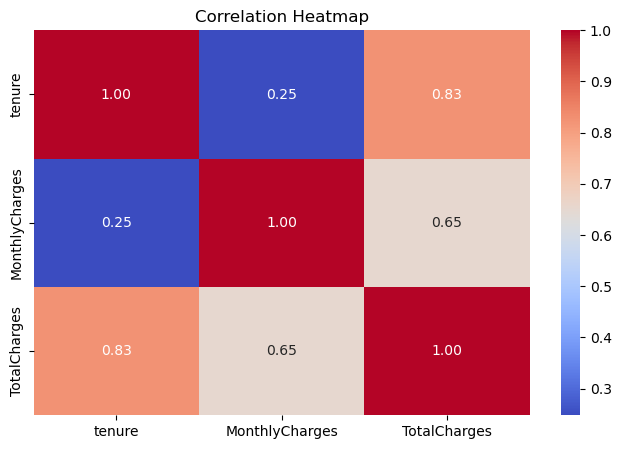

In [26]:
### Correlation Heatmap of Tenure, MonthlyCharges, and TotalCharges

correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()


plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
### Checking the amount of null values in total charges and tenure, and found that TotalCharges had nulls so has to be dropped
print(df[['tenure', 'TotalCharges']].isnull().sum())

df = df.dropna(subset=['TotalCharges'])

tenure           0
TotalCharges    11
dtype: int64


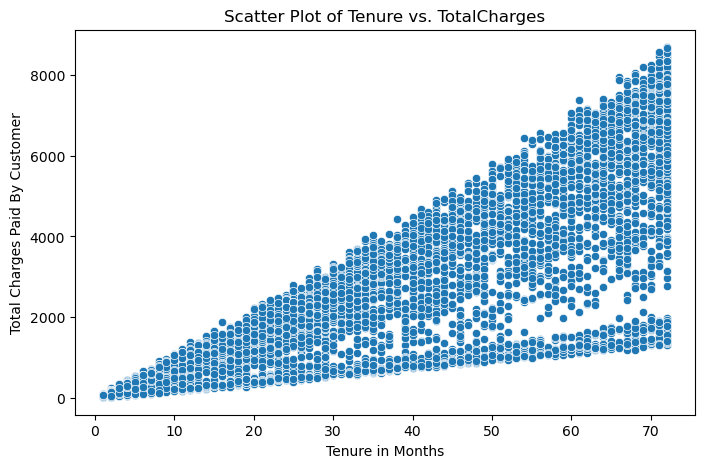

In [28]:
### Scatter Plot of Tenure vs. TotalCharges

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tenure'], y=df['TotalCharges'])
plt.title('Scatter Plot of Tenure vs. TotalCharges')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges Paid By Customer')
plt.show()

In [29]:
### Cross-tabulation to check the contract type with the highest Churn Rate

churn_rate = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

churn_rate

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


Feature Engineering

In [30]:
### Confirming that the entire dataframe does not contain nulls

df.isnull().sum().sum()

0

In [31]:
### Grouping the tenure based on duration

def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <=24:
        return '1-2 Years'
    elif tenure <=48:
        return '2-4 Years'
    else:
        return '4+ Years'


df['TenureGroup'] = df['tenure'].apply(tenure_group)

C:\Users\PC\AppData\Local\Temp\ipykernel_9360\3011640385.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TenureGroup'] = df['tenure'].apply(tenure_group)


In [32]:
### Creating a Charge Per Month Column

df['ChargePerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)

C:\Users\PC\AppData\Local\Temp\ipykernel_9360\4162684450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChargePerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)


In [33]:
### Creating a column for the total number of services used by a single customer

service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['TotalServices'] = df[service_cols].apply(lambda x: sum(x == 'Yes'), axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_9360\2763743354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalServices'] = df[service_cols].apply(lambda x: sum(x == 'Yes'), axis=1)


In [34]:
### One-Hot Encoding for Nominal Categories

df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

In [35]:
### Label Encoding for Tenure Group, which is an Ordinal Category

le = LabelEncoder()
df['TenureGroup'] = le.fit_transform(df['TenureGroup'])

In [36]:
# Removing unwanted columns so as to start creating predictive models

df = df.drop(columns=['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'PaperlessBilling'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   object 
 5   Z_Score                                7032 non-null   float64
 6   TenureGroup                            7032 non-null   int32  
 7   ChargePerMonth                         7032 non-null   float64
 8   TotalServices                          7032 non-null   int64  
 9   Contract_One year                      7032 non-null   bool   
 10  Contract_Two year                      7032 non-null   bool   
 11  PaymentMe

Predictive Models

In [38]:
df = df.dropna()
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Z_Score,TenureGroup,ChargePerMonth,TotalServices,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,29.85,29.85,No,-1.160323,0,14.925000,1,False,False,False,True,False,False,False
1,5575-GNVDE,34,56.95,1889.50,No,-0.259629,2,53.985714,3,True,False,False,False,True,False,False
2,3668-QPYBK,2,53.85,108.15,Yes,-0.362660,0,36.050000,3,False,False,False,False,True,False,False
3,7795-CFOCW,45,42.30,1840.75,No,-0.746535,2,40.016304,3,True,False,False,False,False,False,False
4,9237-HQITU,2,70.70,151.65,Yes,0.197365,0,50.550000,1,False,False,False,True,False,True,False


In [39]:
### Splitting Data into Train & Test Sets


x = df.drop(columns=['Churn', 'customerID'])

y = df['Churn']

# Splitting data (80% training, 20% testing)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display dataset sizes

print('Training set size:', x_train.shape)
print('Testing set size:', x_test.shape)

Training set size: (5625, 14)
Testing set size: (1407, 14)


In [40]:
## Logistic Regression


# training the model

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

# making predictions

y_pred_log = log_model.predict(x_test)


# evaluating accuracy

accuracy_log = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", accuracy_log)

Logistic Regression Accuracy: 0.7917555081734187


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
## Random Forest Classifier to handle Complex Relationships

# Train the model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# make predictions

y_pred_rf = rf_model.predict(x_test)

# evaluate accuracy

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7512437810945274


In [42]:
#df["Churn"] = df["Churn"].str.replace("No", "0")
#df["Churn"] = df["Churn"].str.replace("Yes", "1")
df['Churn'] = df['Churn'].astype('bool')

In [43]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [44]:
## XGBoost (Optimized Gradient Boosting Model)

## Train the model

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

## make predictions

y_pred_xgb = xgb_model.predict(x_test)

## evaluate accuracy

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7704335465529495


In [50]:
### Feature Importance of Random Forest

rf_importance = rf_model.feature_importances_
feature_names = x.columns

# Convert to DataFrame

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


importance_df.to_excel('RF_feature_importance.xlsx', index=False)

In [49]:
### Feature Importance from XGBoost

xgb_importance = pd.DataFrame({'Feature': x.columns, 'Importance': xgb_model.feature_importances_})
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)

# Save to csv
xgb_importance.to_excel('xgb_feature_importance.xlsx', index=False)

In [48]:
# Save dataset with churn predictions

df_test_results = x_test.copy()
df_test_results['ActualChurn'] = y_test
df_test_results['PredictedChurn'] = y_pred_xgb # Best Model

df_test_results.to_excel('churn_predictions.xlsx', index=False)
print("Churn predictions saved for Tableau")
print(df_test_results)

Churn predictions saved for Tableau
      tenure  MonthlyCharges  TotalCharges   Z_Score  TenureGroup  \
2481      61           25.00       1501.75 -1.321517            3   
6784      19           24.70        465.85 -1.331488            1   
6125      13          102.25       1359.00  1.245959            1   
3052      37           55.05       2030.75 -0.322777            2   
4099       6           29.45        161.45 -1.173617            0   
...      ...             ...           ...       ...          ...   
1733       1           19.05         19.05 -1.519271            0   
5250      12           94.55       1173.55  0.990042            0   
5465      26           56.05       1553.20 -0.289541            2   
5851      35          110.80       3836.30  1.530126            2   
3984      72           25.10       1857.85 -1.318194            3   

      ChargePerMonth  TotalServices  Contract_One year  Contract_Two year  \
2481       24.221774              1              False    

In [52]:
df.to_excel('churn_pred.xlsx', index=False)